In [1]:
from MCTS import MCTS
from TSP import TSPGame
from NETS import RecurrentNN, create_training_set, ConvolutionalNN, GraphConvolutionalNN
from EVALUATE import evaluation_run, plot_comparison, create_comparison
from SELFPLAY import Coach
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
class dotdict(dict):
    def __getattr__(self, name):
        return self[name]

In [3]:
num_node = 7
numAssess = 100
numEps = 300
validation_split = 0.2
numGens = 10
patience = 50

args = dotdict({
    # MCTS args
    'numMCTSSims': 500,        # Number of games moves for MCTS to simulate in self-play
    'num_node': num_node,              # Number of nodes in the graph (game)
    'cpuct': 1,
    
    # Self Play
    'numEps': numEps,
    'numAssess': numAssess,
    'numGens': numGens,
    'winThresh': 1.0           # 1 Thresh means replace on any total improvement

    })

rnn_args = dotdict({
    # State representation
    'history': True,           # Whether state representation should be a history of states - used for lstm
    'history_length': None,     # If None full history
    
    # NN args
    'lr': 0.001,
    'dropout': 0.3,
    'epochs': 300,
    'batch_size': 64,
    'validation_split': validation_split,
    'patience': patience
    })

cnn_args = dotdict({
    # State representation
    'history': False,           # Whether state representation should be a history of states - used for lstm
    
    # NN args
    'lr': 0.001,
    'dropout': 0.3,
    'epochs': 300,
    'batch_size': 64,
    'num_channels': 256,
    'validation_split': validation_split,
    'patience': patience
    })

gnn_args = dotdict({
    # State representation
    'history': False,           # Whether state representation should be a history of states - used for lstm
    
    # NN args
    'lr': 0.001,
    'epochs': 500,
    'batch_size': 64,
    'validation_split': validation_split,
    'patience': patience
    })

gnn_args.update(args)
cnn_args.update(args)
rnn_args.update(args)

In [4]:
%%time

# Create a optimal dataset from 10000 games
dataset = create_training_set(gnn_args, 5000)

CPU times: user 2min 4s, sys: 298 ms, total: 2min 5s
Wall time: 2min 5s


In [5]:
# Create RNN
rnn = RecurrentNN(rnn_args)
gnn = GraphConvolutionalNN(gnn_args)
cnn = ConvolutionalNN(cnn_args)

### Train

In [6]:
filename = '7node_5000sample'

In [7]:
%%time
rnn_hist = rnn.train(dataset)
rnn.save_model('rnn_'+filename)

Training...
Train on 24000 samples, validate on 6000 samples
Epoch 1/300
24000/24000 [==============================] - 20s 822us/step - loss: 1.5990 - pi_loss: 1.4317 - v_loss: 0.1674 - val_loss: 1.2039 - val_pi_loss: 1.1398 - val_v_loss: 0.0641
Epoch 2/300
24000/24000 [==============================] - 18s 735us/step - loss: 1.2511 - pi_loss: 1.1854 - v_loss: 0.0656 - val_loss: 1.1594 - val_pi_loss: 1.1007 - val_v_loss: 0.0587
Epoch 3/300
24000/24000 [==============================] - 18s 737us/step - loss: 1.2118 - pi_loss: 1.1518 - v_loss: 0.0599 - val_loss: 1.1601 - val_pi_loss: 1.1019 - val_v_loss: 0.0582
Epoch 4/300
24000/24000 [==============================] - 18s 761us/step - loss: 1.1880 - pi_loss: 1.1297 - v_loss: 0.0583 - val_loss: 1.1544 - val_pi_loss: 1.0968 - val_v_loss: 0.0576
Epoch 5/300
24000/24000 [==============================] - 18s 769us/step - loss: 1.1737 - pi_loss: 1.1169 - v_loss: 0.0568 - val_loss: 1.1515 - val_pi_loss: 1.1008 - val_v_loss: 0.0507
Epoch 6/3

24000/24000 [==============================] - 18s 755us/step - loss: 0.9382 - pi_loss: 0.8905 - v_loss: 0.0477 - val_loss: 0.8826 - val_pi_loss: 0.8347 - val_v_loss: 0.0479
Epoch 45/300
24000/24000 [==============================] - 18s 771us/step - loss: 0.9361 - pi_loss: 0.8891 - v_loss: 0.0471 - val_loss: 0.8701 - val_pi_loss: 0.8222 - val_v_loss: 0.0479
Epoch 46/300
24000/24000 [==============================] - 19s 775us/step - loss: 0.9272 - pi_loss: 0.8800 - v_loss: 0.0472 - val_loss: 0.8791 - val_pi_loss: 0.8316 - val_v_loss: 0.0475
Epoch 47/300
24000/24000 [==============================] - 18s 767us/step - loss: 0.9200 - pi_loss: 0.8726 - v_loss: 0.0475 - val_loss: 0.8604 - val_pi_loss: 0.8125 - val_v_loss: 0.0478
Epoch 48/300
24000/24000 [==============================] - 19s 774us/step - loss: 0.9178 - pi_loss: 0.8708 - v_loss: 0.0470 - val_loss: 0.8570 - val_pi_loss: 0.8105 - val_v_loss: 0.0465
Epoch 49/300
24000/24000 [==============================] - 18s 765us/step - l

Epoch 88/300
24000/24000 [==============================] - 21s 888us/step - loss: 0.7700 - pi_loss: 0.7245 - v_loss: 0.0454 - val_loss: 0.7295 - val_pi_loss: 0.6851 - val_v_loss: 0.0444
Epoch 89/300
24000/24000 [==============================] - 21s 859us/step - loss: 0.7747 - pi_loss: 0.7292 - v_loss: 0.0455 - val_loss: 0.7307 - val_pi_loss: 0.6870 - val_v_loss: 0.0438
Epoch 90/300
24000/24000 [==============================] - 21s 889us/step - loss: 0.7703 - pi_loss: 0.7253 - v_loss: 0.0449 - val_loss: 0.7322 - val_pi_loss: 0.6882 - val_v_loss: 0.0440
Epoch 91/300
24000/24000 [==============================] - 19s 788us/step - loss: 0.7665 - pi_loss: 0.7210 - v_loss: 0.0455 - val_loss: 0.7334 - val_pi_loss: 0.6865 - val_v_loss: 0.0469
Epoch 92/300
24000/24000 [==============================] - 19s 781us/step - loss: 0.7603 - pi_loss: 0.7151 - v_loss: 0.0452 - val_loss: 0.7357 - val_pi_loss: 0.6894 - val_v_loss: 0.0463
Epoch 93/300
24000/24000 [==============================] - 19s 7

Epoch 132/300
24000/24000 [==============================] - 19s 806us/step - loss: 0.6889 - pi_loss: 0.6449 - v_loss: 0.0439 - val_loss: 0.6976 - val_pi_loss: 0.6538 - val_v_loss: 0.0438
Epoch 133/300
24000/24000 [==============================] - 19s 777us/step - loss: 0.6891 - pi_loss: 0.6453 - v_loss: 0.0438 - val_loss: 0.6985 - val_pi_loss: 0.6557 - val_v_loss: 0.0428
Epoch 134/300
24000/24000 [==============================] - 18s 769us/step - loss: 0.6938 - pi_loss: 0.6500 - v_loss: 0.0439 - val_loss: 0.6984 - val_pi_loss: 0.6559 - val_v_loss: 0.0425
Epoch 135/300
24000/24000 [==============================] - 18s 762us/step - loss: 0.6826 - pi_loss: 0.6383 - v_loss: 0.0444 - val_loss: 0.6936 - val_pi_loss: 0.6505 - val_v_loss: 0.0431
Epoch 136/300
24000/24000 [==============================] - 18s 758us/step - loss: 0.6831 - pi_loss: 0.6397 - v_loss: 0.0434 - val_loss: 0.6871 - val_pi_loss: 0.6441 - val_v_loss: 0.0430
Epoch 137/300
24000/24000 [==============================] -

24000/24000 [==============================] - 20s 829us/step - loss: 0.6408 - pi_loss: 0.5977 - v_loss: 0.0431 - val_loss: 0.6799 - val_pi_loss: 0.6367 - val_v_loss: 0.0432
Epoch 176/300
24000/24000 [==============================] - 19s 783us/step - loss: 0.6447 - pi_loss: 0.6014 - v_loss: 0.0433 - val_loss: 0.6827 - val_pi_loss: 0.6400 - val_v_loss: 0.0427
Epoch 177/300
24000/24000 [==============================] - 18s 767us/step - loss: 0.6340 - pi_loss: 0.5911 - v_loss: 0.0429 - val_loss: 0.6842 - val_pi_loss: 0.6419 - val_v_loss: 0.0422
Epoch 178/300
24000/24000 [==============================] - 19s 786us/step - loss: 0.6379 - pi_loss: 0.5948 - v_loss: 0.0432 - val_loss: 0.6868 - val_pi_loss: 0.6408 - val_v_loss: 0.0460
Epoch 179/300
24000/24000 [==============================] - 19s 771us/step - loss: 0.6332 - pi_loss: 0.5899 - v_loss: 0.0433 - val_loss: 0.6899 - val_pi_loss: 0.6470 - val_v_loss: 0.0429
Epoch 180/300
24000/24000 [==============================] - 18s 768us/ste

Epoch 219/300
24000/24000 [==============================] - 19s 774us/step - loss: 0.6025 - pi_loss: 0.5602 - v_loss: 0.0423 - val_loss: 0.6765 - val_pi_loss: 0.6335 - val_v_loss: 0.0430
Epoch 220/300
24000/24000 [==============================] - 19s 775us/step - loss: 0.5976 - pi_loss: 0.5549 - v_loss: 0.0427 - val_loss: 0.6833 - val_pi_loss: 0.6407 - val_v_loss: 0.0426
Epoch 221/300
24000/24000 [==============================] - 19s 772us/step - loss: 0.5938 - pi_loss: 0.5516 - v_loss: 0.0422 - val_loss: 0.6768 - val_pi_loss: 0.6341 - val_v_loss: 0.0427
Epoch 222/300
24000/24000 [==============================] - 18s 770us/step - loss: 0.6013 - pi_loss: 0.5585 - v_loss: 0.0428 - val_loss: 0.6745 - val_pi_loss: 0.6322 - val_v_loss: 0.0423
Epoch 223/300
24000/24000 [==============================] - 20s 833us/step - loss: 0.5988 - pi_loss: 0.5556 - v_loss: 0.0432 - val_loss: 0.6874 - val_pi_loss: 0.6455 - val_v_loss: 0.0419
Epoch 224/300
24000/24000 [==============================] -

24000/24000 [==============================] - 19s 779us/step - loss: 0.5713 - pi_loss: 0.5290 - v_loss: 0.0423 - val_loss: 0.6763 - val_pi_loss: 0.6343 - val_v_loss: 0.0420
Epoch 263/300
24000/24000 [==============================] - 19s 771us/step - loss: 0.5620 - pi_loss: 0.5192 - v_loss: 0.0427 - val_loss: 0.6974 - val_pi_loss: 0.6531 - val_v_loss: 0.0444
Epoch 264/300
24000/24000 [==============================] - 19s 773us/step - loss: 0.5602 - pi_loss: 0.5174 - v_loss: 0.0428 - val_loss: 0.6809 - val_pi_loss: 0.6384 - val_v_loss: 0.0426
Epoch 265/300
24000/24000 [==============================] - 19s 812us/step - loss: 0.5618 - pi_loss: 0.5194 - v_loss: 0.0424 - val_loss: 0.6966 - val_pi_loss: 0.6501 - val_v_loss: 0.0465
Epoch 266/300
24000/24000 [==============================] - 20s 840us/step - loss: 0.5716 - pi_loss: 0.5291 - v_loss: 0.0425 - val_loss: 0.6813 - val_pi_loss: 0.6396 - val_v_loss: 0.0416
Epoch 267/300
24000/24000 [==============================] - 19s 812us/ste

In [8]:
%%time
gnn_losses = gnn.train(dataset)
gnn.save_model('gnn_'+filename)

/Users/TZilkha/anaconda3/lib/python3.6/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/TZilkha/anaconda3/lib/python3.6/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([7])) that is different to the input size (torch.Size([7, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 10/500 Loss - 0.5338074041682249
Epoch 20/500 Loss - 0.47130546520894656
Epoch 30/500 Loss - 0.45168310159929265
Epoch 40/500 Loss - 0.4458344040328043
Epoch 50/500 Loss - 0.43009870553366736
Epoch 60/500 Loss - 0.410545963197558
Epoch 70/500 Loss - 0.40230013157637573
Epoch 80/500 Loss - 0.3948446414837491
Epoch 90/500 Loss - 0.393292023332254
Epoch 100/500 Loss - 0.3906958867750422
Epoch 110/500 Loss - 0.39177896772134485
Epoch 120/500 Loss - 0.39042000823333245
Epoch 130/500 Loss - 0.3897811782152853
Epoch 140/500 Loss - 0.38855186935453906
Epoch 150/500 Loss - 0.38745287139834067
Epoch 160/500 Loss - 0.3897757195603385
Epoch 170/500 Loss - 0.38767228450897573
Epoch 180/500 Loss - 0.38613201028816124
Epoch 190/500 Loss - 0.3844342878923601
Epoch 200/500 Loss - 0.3828137638508626
Epoch 210/500 Loss - 0.38512598627883987
Epoch 220/500 Loss - 0.38497943690058545
Epoch 230/500 Loss - 0.383895142927206
Epoch 240/500 Loss - 0.3842627371910245
Epoch 250/500 Loss - 0.38319261966452883

In [9]:
%%time
cnn_hist = cnn.train(dataset)
cnn.save_model('cnn_'+filename)

Training...
Train on 24000 samples, validate on 6000 samples
Epoch 1/300
24000/24000 [==============================] - 70s 3ms/step - loss: 1.7680 - pi_loss: 1.2337 - v_loss: 0.5344 - val_loss: 1.7171 - val_pi_loss: 1.4622 - val_v_loss: 0.2550
Epoch 2/300
24000/24000 [==============================] - 68s 3ms/step - loss: 1.3078 - pi_loss: 1.1087 - v_loss: 0.1991 - val_loss: 1.1069 - val_pi_loss: 1.0515 - val_v_loss: 0.0553
Epoch 3/300
24000/24000 [==============================] - 72s 3ms/step - loss: 1.0983 - pi_loss: 1.0211 - v_loss: 0.0772 - val_loss: 1.0660 - val_pi_loss: 1.0158 - val_v_loss: 0.0502
Epoch 4/300
24000/24000 [==============================] - 72s 3ms/step - loss: 1.0232 - pi_loss: 0.9637 - v_loss: 0.0595 - val_loss: 1.0061 - val_pi_loss: 0.9474 - val_v_loss: 0.0587
Epoch 5/300
24000/24000 [==============================] - 70s 3ms/step - loss: 0.9655 - pi_loss: 0.9096 - v_loss: 0.0559 - val_loss: 0.9356 - val_pi_loss: 0.8820 - val_v_loss: 0.0536
Epoch 6/300
24000/2

24000/24000 [==============================] - 70s 3ms/step - loss: 0.1112 - pi_loss: 0.0754 - v_loss: 0.0358 - val_loss: 1.2610 - val_pi_loss: 1.2307 - val_v_loss: 0.0303
Epoch 46/300
24000/24000 [==============================] - 71s 3ms/step - loss: 0.1103 - pi_loss: 0.0755 - v_loss: 0.0348 - val_loss: 1.2426 - val_pi_loss: 1.2082 - val_v_loss: 0.0344
Epoch 47/300
24000/24000 [==============================] - 71s 3ms/step - loss: 0.1057 - pi_loss: 0.0705 - v_loss: 0.0351 - val_loss: 1.2381 - val_pi_loss: 1.2037 - val_v_loss: 0.0344
Epoch 48/300
24000/24000 [==============================] - 73s 3ms/step - loss: 0.1022 - pi_loss: 0.0661 - v_loss: 0.0361 - val_loss: 1.2708 - val_pi_loss: 1.2397 - val_v_loss: 0.0310
Epoch 49/300
24000/24000 [==============================] - 71s 3ms/step - loss: 0.0996 - pi_loss: 0.0644 - v_loss: 0.0351 - val_loss: 1.2864 - val_pi_loss: 1.2512 - val_v_loss: 0.0352
Epoch 50/300
24000/24000 [==============================] - 72s 3ms/step - loss: 0.0970 

In [10]:
rnn.load_model("rnn_"+filename)
gnn.load_model("gnn_"+filename)
cnn.load_model('cnn_'+filename)

Loaded model from disk
Loaded model from disk
Loaded model from disk


In [45]:
def plot_training(history, model_name):
    # Plot training & validation v loss values
    plt.plot(history['v_loss'])
    plt.plot(history['val_v_loss'])
    plt.title(model_name+' - v Training Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['v', 'val_v'])
    plt.show()

    # Plot training & validation pi loss values
    plt.plot(history['pi_loss'])
    plt.plot(history['val_pi_loss'])
    plt.title(model_name+' - pi Training Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['pi', 'val_pi'])
    plt.show()

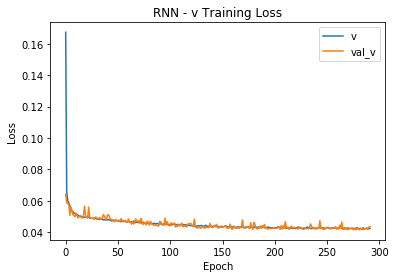

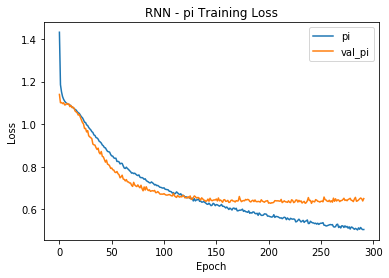

In [46]:
plot_training(rnn_hist.history, 'RNN')

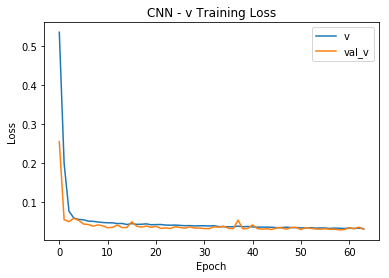

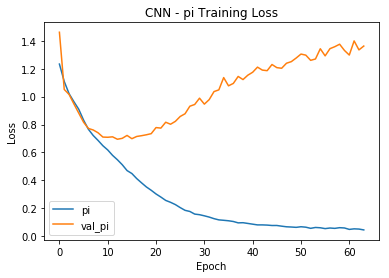

In [47]:
plot_training(cnn_hist.history, 'CNN')

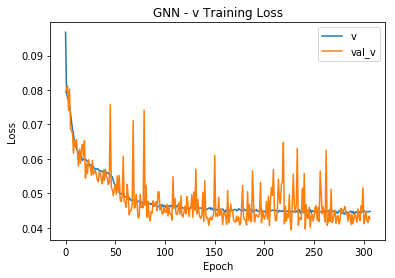

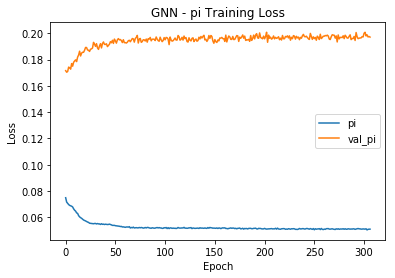

In [48]:
plot_training(gnn_losses, 'GNN')

### Evaluate

In [49]:
%%time

args['numMCTSSims']=2000

game_list = [TSPGame(args) for i in range(100)]

nets = {"No NN": None, 
        "LSTM": rnn,
        'GNN': gnn,
        'CNN': cnn}

res = create_comparison(game_list, nets, args)

0...1...2...3...4...5...6...7...8...9...10...11...12...13...14...15...16...17...18...19...20...21...22...23...24...25...26...27...28...29...30...31...32...33...34...35...36...37...38...39...40...41...42...43...44...45...46...47...48...49...50...51...52...53...54...55...56...57...58...59...60...61...62...63...64...65...66...67...68...69...70...71...72...73...74...75...76...77...78...79...80...81...82...83...84...85...86...87...88...89...90...91...92...93...94...95...96...97...98...99...
CPU times: user 18min 59s, sys: 32.3 s, total: 19min 31s
Wall time: 18min 31s


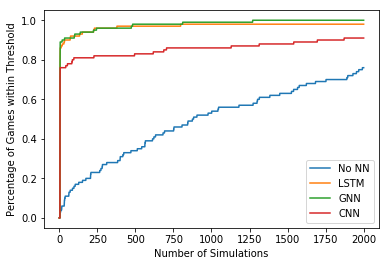

In [50]:
plot_comparison(res)